# Workshop Final - NPL - Clasificación de Sentimientos

**Integrantes del grupo:**

- Kevin Tasat
- Martha Alvarez
- Fernando Roa

### Resumen



El dataset a evaluar tiene un total de 16000 textos a los cuales se les asocian diferentes sentimientos o emociones. El objetivo de este trabajo es mediante análisis de lenguaje natural preparar la información y posteriormente entrenar un modelo de clasificación de emociones.

# Modelos

### Importar librerías

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns;sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.colors import ListedColormap
import statsmodels.api as sm
import math
from math import sqrt

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn import svm
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report, auc
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline

from IPython.display import Image
import itertools
import plotly.express as px
from itertools import chain
from pprint import pprint
from time import time
import logging

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet as wn
from nltk import word_tokenize, pos_tag
from collections import defaultdict
#nltk.download('all')
#nltk.download('averaged_perceptron_tagger')

from collections import Counter
import re
import string

from gensim.parsing.preprocessing import remove_stopwords
from gensim.parsing.preprocessing import STOPWORDS

from textblob import TextBlob

from wordhoard import Antonyms
import random

pd.set_option('display.float_format', lambda x: '%.5f' % x)


### Lectura del dataset

In [2]:
# Se importa un dataset el cual será usado para entrenamiento

df = pd.read_csv('train.txt',delimiter=";",header=None,names=['corpus','feeling'])

# Se importa un dataset el cual será usado para pruebas

df_test=pd.read_csv('test.txt',delimiter=";",header=None,names=['corpus','feeling'])

In [21]:
# Se listan las clases posibles presentes en el dataset

clases=list(df.feeling.unique())
clases=sorted(clases)
clases

['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']

### Creación de funciones

In [3]:
# Se carga el listado de stopwords que fue afinado en el notebook AnalisisExplor_RefinaStopw.ipynb

df_stop_words = pd.read_csv('stopwords.csv')
stop_words = df_stop_words['stopwords'].tolist()

In [4]:
# Se construye un diccionario con contracciones y sus respectivas palabras extendidas

contractions = { 
"ain't": "am not",
"aren't": "am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"i'd": "I had",
"i'd've": "I would have",
"i'll": "I will",
"i'll've": "I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that had",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there had",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they had",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [5]:
# Se crea una función para limpiar el texto

def clean_text(text):
    '''Se remueven caracteres indeseados, stopwords y formatea el texto'''
    
    # Convertir el texto en minúscula
    text = text.lower()
    
    # Reemplaza contracciones por su formato extendido 
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)
    
    # Formatea palabras y remueve caracteres no deseados
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)
    
    # Remueve stopwords
    text = text.split()
    stops = stop_words
    text = [w for w in text if not w in stops]
    text = " ".join(text)
        
    # Corrección de ortografía (tarda demasiado y no da buenos resultados)
    
    #text = TextBlob(text).correct() 
    #text = text.__str__() # opcion 1 (tarda demasiado)
    #text = '{}'.format(text) #opcion2 (tarda demasiado)
    #text = str(TextBlob(text).correct()) #opcion3 (tarda demasiado)
    
    # Lematizar 
    
    #Defaultdict is a container like dictionaries present in the module collections. 
    #Defaultdict is a sub-class of the dictionary class that returns a dictionary-like object. 
    #The functionality of both dictionaries and defaultdict are almost same except for the fact that defaultdict never raises a KeyError. 
    #It provides a default value for the key that does not exists.

    tag_map = defaultdict(lambda : wn.NOUN)
    tag_map['J'] = wn.ADJ
    tag_map['V'] = wn.VERB
    tag_map['R'] = wn.ADV

    tokens = word_tokenize(text)
    lmtzr = WordNetLemmatizer()
    
    new_text2=[]
    
    for token, tag in pos_tag(tokens):
        lemma = lmtzr.lemmatize(token, tag_map[tag[0]])
        new_text2.append(lemma)
        text=" ".join(new_text2)
        
    return text

In [6]:
# Se crea una función de limpieza lambda a partir de la función de limpieza original

clean_lambda = lambda x: clean_text(x)

In [7]:
# Se crea la columna 'clean_corpus' aplicando la función de limpieza

df_test['clean_corpus'] = df_test.corpus.apply(clean_lambda)

In [8]:
# Se valida el tamaño del dataset

df_test.shape

(2000, 3)

In [9]:
# Se visualizan los primeros registros del dataset

df_test.head()

,corpus,feeling,clean_corpus
0,im feeling rather rotten so im not very ambiti...,sadness,rather rotten ambitious
1,im updating my blog because i feel shitty,sadness,update blog shitty
2,i never make her separate from me because i do...,sadness,never separate ever ashamed
3,i left with my bouquet of red and yellow tulip...,joy,leave bouquet red yellow tulip arm slightly op...
4,i was feeling a little vain when i did this one,sadness,vain


### Matriz Sparsa de Test

In [10]:
# Se instancia un vectorizador

params_tfv = {'max_features': 5000,
             'max_df':0.75,
             'ngram_range': (1, 2),
             'stop_words': stop_words,
             'strip_accents': 'unicode',
             'norm': 'l1',
             'sublinear_tf': True,
             'use_idf': True}

vectorizer=TfidfVectorizer(**params_tfv)

In [11]:
# Se vectoriza el dataframe de test

df_test_matrix=vectorizer.fit_transform(df_test.clean_corpus)
df_test_matrix

<2000x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 14023 stored elements in Compressed Sparse Row format>

## Entrenamiento de modelos

In [12]:
# Clase para identificar negación antes de una palabra
# transforma la negación en not y transforma la palabra en su antónimo
# Lo anterior trata de invertir el significado luego de pasar el texto por 
# stop words

class negation_transformer(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass
        
    @staticmethod
    # negate_sequence(text)
    #   text: sentence to process (creation of uni/bi
    #    is handled here)
    #
    # Detects negations and transforms negated words into 'not_' form
    #
    def negate_sequence(text):

        def antonyms_for(word):
            antonyms = set()
            for ss in wn.synsets(word):
                for lemma in ss.lemmas():
                    any_pos_antonyms = [ antonym.name() for antonym in lemma.antonyms() ]
                    for antonym in any_pos_antonyms:
                        antonym_synsets = wn.synsets(antonym)
                        if wn.ADJ not in [ ss.pos() for ss in antonym_synsets ]:
                            continue
                        antonyms.add(antonym)
            if antonyms==set():
                return word
            else:
                antonyms=list(antonyms)
                return antonyms[0]

        negation = False
        delims = "?.,!:;"
        result = []
        words = text.split()
        prev = None
        pprev = None
        for word in words:
            stripped = word.strip(delims).lower()
            negated = "not " + stripped if negation else stripped
            result.append(negated)

            if prev:
                bigram = prev + " " + negated
                pprev = prev
            prev = negated

            if any(neg in word for neg in ["not", "n't", "no"]):
                negation = not negation

            if any(c in word for c in delims):
                negation = False

        for elements in result:
            
            element=word_tokenize(elements)
            
            element0=0
            element_change=1
            
            if element[0]=="not" and len(element)>1 and element[1]!="feel":
                
                element0=" ".join(element)
                
                element_change=antonyms_for(element[1])
        
            result=[element_change if item == element0 else item for item in result]

        return " ".join(result)
    
    def fit(self, texto, y=None):
        return self

    def transform(self, texto):
        if isinstance(texto, pd.Series):
            texto=texto.apply(lambda x: self.negate_sequence(x))
        else:
            texto=pd.Series(texto)
            texto=texto.apply(lambda x: self.negate_sequence(x))
            
        return texto

In [13]:
# Clase para limpiar texto

class clean_texto(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass
        
    @staticmethod
    def clean_text(text):
        '''Remove unwanted characters, stopwords, and format the text to create fewer nulls word embeddings'''

        # Convert words to lower case
        text = text.lower()

        # Replace contractions with their longer forms 
        if True:
            text = text.split()
            new_text = []
            for word in text:
                if word in contractions:
                    new_text.append(contractions[word])
                else:
                    new_text.append(word)
            text = " ".join(new_text)

        # Format words and remove unwanted characters
        text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
        text = re.sub(r'\<a href', ' ', text)
        text = re.sub(r'&amp;', '', text) 
        text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
        text = re.sub(r'<br />', ' ', text)
        text = re.sub(r'\'', ' ', text)

        # remove stop words
        #if remove_stopwords:
        text = text.split()
        stops = stop_words
        text = [w for w in text if not w in stops]
        text = " ".join(text)

        # spelling correction (tarda demasiado y no da buenos resultados)
        #text = TextBlob(text).correct() 
        #text = text.__str__() # opcion 1 (tarda demasiado)
        #text = '{}'.format(text) #opcion2 (tarda demasiado)
        #text = str(TextBlob(text).correct()) #opcion3 (tarda demasiado)

        #Lemmatize 

        #Defaultdict is a container like dictionaries present in the module collections. 
        #Defaultdict is a sub-class of the dictionary class that returns a dictionary-like object. 
        #The functionality of both dictionaries and defaultdict are almost same except for the fact that defaultdict never raises a KeyError. 
        #It provides a default value for the key that does not exists.
        
        tag_map = defaultdict(lambda : wn.NOUN)
        tag_map['J'] = wn.ADJ
        tag_map['V'] = wn.VERB
        tag_map['R'] = wn.ADV

        tokens = word_tokenize(text)
        lmtzr = WordNetLemmatizer()

        new_text2=[]

        for token, tag in pos_tag(tokens):
            lemma = lmtzr.lemmatize(token, tag_map[tag[0]])
            new_text2.append(lemma)
            text=" ".join(new_text2)
        
        return text
    
    def fit(self, texto, y=None):
        return self

    def transform(self, texto):
        if isinstance(texto, pd.Series):
            texto=texto.apply(lambda x: self.clean_text(x))
        else:
            texto=pd.Series(texto)
            texto=texto.apply(lambda x: self.clean_text(x))
            
        return texto

### Modelo MultinomialNB

In [15]:
# Se define un pipeline para el Multinomial NB con los mejores hiperparámetros encontrados
# usando gridSearchCV

parameters_vect = {
    "max_df": 0.5,
    "strip_accents": 'unicode', 
    "stop_words": stop_words,
    'max_features': 5000,
    "ngram_range": (1, 2),  
    'use_idf': True,
    'sublinear_tf': True,
    'norm': 'l1'
}

parameters_clf ={
    "alpha": 1.0,
    "fit_prior": False
}


pasos = [('negation_transformer',negation_transformer()),
         ('clean_texto',clean_texto()),
         ("vect", TfidfVectorizer(**parameters_vect)),
         ("clf", MultinomialNB(**parameters_clf))]

pipe_mnb = Pipeline(pasos)

In [16]:
pipe_mnb.fit(df.corpus, df.feeling)

Pipeline(steps=[('negation_transformer', negation_transformer()),
                ('clean_texto', clean_texto()),
                ('vect',
                 TfidfVectorizer(max_df=0.5, max_features=5000,
                                 ngram_range=(1, 2), norm='l1',
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 strip_accents='unicode', sublinear_tf=True)),
                ('clf', Multinomia

In [17]:
X_test_mnb=df_test['corpus']

In [18]:
y_test_mnb=df_test['feeling']

In [19]:
y_test_mnb.value_counts()

joy         695
sadness     581
anger       275
fear        224
love        159
surprise     66
Name: feeling, dtype: int64

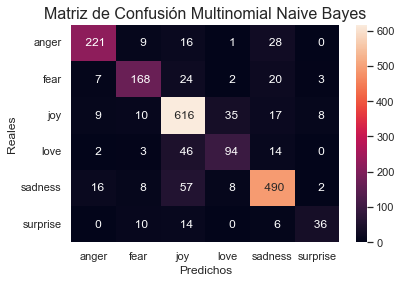

              precision    recall  f1-score   support

       anger     0.8667    0.8036    0.8340       275
        fear     0.8077    0.7500    0.7778       224
         joy     0.7969    0.8863    0.8392       695
        love     0.6714    0.5912    0.6288       159
     sadness     0.8522    0.8434    0.8478       581
    surprise     0.7347    0.5455    0.6261        66

    accuracy                         0.8125      2000
   macro avg     0.7883    0.7367    0.7589      2000
weighted avg     0.8117    0.8125    0.8103      2000



In [22]:
# Calculamos las predicciones y métricas sobre la data de prueba

predicciones_mnb =pipe_mnb.predict(X_test_mnb)
sns.heatmap(confusion_matrix(y_test_mnb, predicciones_mnb), annot=True, fmt='4d',xticklabels=clases, yticklabels=clases)
plt.xlabel('Predichos')
plt.ylabel('Reales')
plt.title('Matriz de Confusión Multinomial Naive Bayes', fontsize=16)
plt.show()
print(classification_report(y_test_mnb, predicciones_mnb, digits=4))

In [30]:
x=pipe_mnb.predict("Today I feel confident while talking to people, and feel that I have been able to develop some control over my own life.")
x[0]

'joy'

**Conclusión:** El modelo Multinomial Naive Bayes tiene un buen rendimiento, con un accuracy del 81.60%

### Random Forest

In [31]:
# Se define un pipeline para el Random Forest con los mejores hiperparámetros encontrados
# usando gridSearchCV

parameters_vect = {
    "max_df": 0.5,
    "strip_accents": 'unicode', 
    "stop_words": stop_words,
    'max_features': None,
    "ngram_range": (1, 1),  
    'use_idf': True,
    'sublinear_tf': True,
    'norm': 'l2'
}


parameters_clf ={
    'bootstrap': False, 
               'class_weight': 'balanced_subsample', 
               'criterion': 'gini',
               'max_depth': 8, 
               'max_features': 'auto', 
               'min_samples_leaf': 8,
               'min_samples_split': 5, 
               'n_estimators': 100
}


pasos = [('negation_transformer',negation_transformer()),
         ('clean_texto',clean_texto()),
         ("vect", TfidfVectorizer(**parameters_vect)),
         ("clf", RandomForestClassifier(**parameters_clf))]

pipe_rf = Pipeline(pasos)

In [32]:
pipe_rf.fit(df.corpus, df.feeling)

Pipeline(steps=[('negation_transformer', negation_transformer()),
                ('clean_texto', clean_texto()),
                ('vect',
                 TfidfVectorizer(max_df=0.5,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 strip_accents='unicode', sublinear_tf=True)),
                ('clf',
                 RandomForestClassifier(bootstrap=False,
                                    

In [33]:
X_test_mnb=df_test['corpus']

In [34]:
y_test_mnb=df_test['feeling']

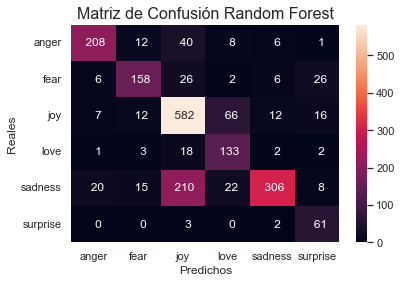

              precision    recall  f1-score   support

       anger     0.8595    0.7564    0.8046       275
        fear     0.7900    0.7054    0.7453       224
         joy     0.6621    0.8374    0.7395       695
        love     0.5758    0.8365    0.6821       159
     sadness     0.9162    0.5267    0.6689       581
    surprise     0.5351    0.9242    0.6778        66

    accuracy                         0.7240      2000
   macro avg     0.7231    0.7644    0.7197      2000
weighted avg     0.7663    0.7240    0.7220      2000



In [35]:
# Calculamos las predicciones y métricas sobre la data de prueba


predicciones_rf = pipe_rf.predict(X_test_mnb)
sns.heatmap(confusion_matrix(y_test_mnb, predicciones_rf), annot=True, fmt='4d',xticklabels=clases, yticklabels=clases)
plt.xlabel('Predichos')
plt.ylabel('Reales')
plt.title('Matriz de Confusión Random Forest', fontsize=16)
plt.show()
print(classification_report(y_test_mnb, predicciones_rf, digits=4))

**Conclusión:** El modelo funciona de forma aceptable para la mayoría de sentimientos, a excepción de 'fear', sentimiento que en una buena proporción es predicho como 'love'. Alcanza un accuracy del 70.40%

### Multinomial Logistic Regression

In [37]:
# Se define un pipeline para el Multinomial Logistic regresion con los mejores hiperparámetros encontrados
# usando gridSearchCV

parameters_vect = {
    "max_df": 0.5,
    "strip_accents": 'unicode', 
    "stop_words": stop_words,
    'max_features': 5000,
    "ngram_range": (1, 1),  
    'use_idf': True,
    'sublinear_tf': True,
    'norm': 'l2'
}

parameters_clf ={
    'penalty':'l2',
    'fit_intercept':True,
    'C':1.0,
    'class_weight': 'balanced',
    'multi_class': 'multinomial',
    'solver':'lbfgs',
    'max_iter':500
}


pasos = [('negation_transformer',negation_transformer()),
         ('clean_texto',clean_texto()),
         ("vect", TfidfVectorizer(**parameters_vect)),
         ("clf", LogisticRegression(**parameters_clf))]

pipe_lr =Pipeline(pasos)

In [38]:
pipe_lr.fit(df.corpus, df.feeling)

Pipeline(steps=[('negation_transformer', negation_transformer()),
                ('clean_texto', clean_texto()),
                ('vect',
                 TfidfVectorizer(max_df=0.5, max_features=5000,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 strip_accents='unicode', sublinear_tf=True)),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=500,

In [39]:
X_test_mnb=df_test['corpus']

In [40]:
y_test_mnb=df_test['feeling']

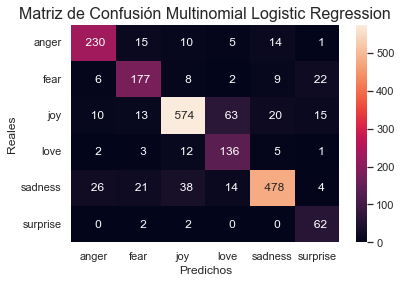

              precision    recall  f1-score   support

       anger     0.8394    0.8364    0.8379       275
        fear     0.7662    0.7902    0.7780       224
         joy     0.8913    0.8259    0.8574       695
        love     0.6182    0.8553    0.7177       159
     sadness     0.9087    0.8227    0.8636       581
    surprise     0.5905    0.9394    0.7251        66

    accuracy                         0.8285      2000
   macro avg     0.7691    0.8450    0.7966      2000
weighted avg     0.8436    0.8285    0.8321      2000



In [42]:
# Calculamos las predicciones y métricas sobre la data de prueba

predicciones_lr=pipe_lr.predict(X_test_mnb)
sns.heatmap(confusion_matrix(y_test_mnb, predicciones_lr), annot=True, fmt='4d',xticklabels=clases, yticklabels=clases)
plt.xlabel('Predichos')
plt.ylabel('Reales')
plt.title('Matriz de Confusión Multinomial Logistic Regression', fontsize=16)
plt.show()
print(classification_report(y_test_mnb, predicciones_lr, digits=4))

**Conclusion:** El modelo tiene un rendimiento bastante bueno, alcanzando un accuracy del 83.10%, siendo el mejor resultado entre los modelos entrenados.

## Comparativo modelos

In [43]:
# Calculamos el accuracy de cada modelo en la data de test

acc_mnb = accuracy_score(y_test_mnb, predicciones_mnb)
acc_rf = accuracy_score(y_test_mnb, predicciones_rf)
acc_lg = accuracy_score(y_test_mnb, predicciones_lr)

comparativo = pd.DataFrame({'Modelo': ['Multinomial Naive Bayes',
                                      'Random Forest',
                                      'Multinomial Logistic R'],
                            'Accuracy_test':[acc_mnb,
                                            acc_rf,
                                            acc_lg]})

comparativo.head()                

,Modelo,Accuracy_test
0,Multinomial Naive Bayes,0.81250
1,Random Forest,0.72400
2,Multinomial Logistic R,0.82850


**Conclusión:** El modelo elegido para utilizar en el bot de telegram es el Multinomail Logistic Regression considerando que alcanzó un mayor accuracy al evaluar la data de test.

## Guardar el modelo seleccionado

In [44]:
# Importamos la librería joblib para guardar el pipe del modelo

import joblib

path_pipe = "pipe_model.sav"
joblib.dump(pipe_lr, path_pipe)

['pipe_model.sav']